# Example 02 - SDTM DM dataset creation using Python
This program can create SDTM DM SAS xpt dataset from EDC raw SAS datasets. 

In [1]:
### Import modules
from pandas import Series, DataFrame
import pandas as pd
import xport  ## write sas datasets to local drive
#from sas7bdat import SAS7BDAT  ## read SAS datasets from local drive

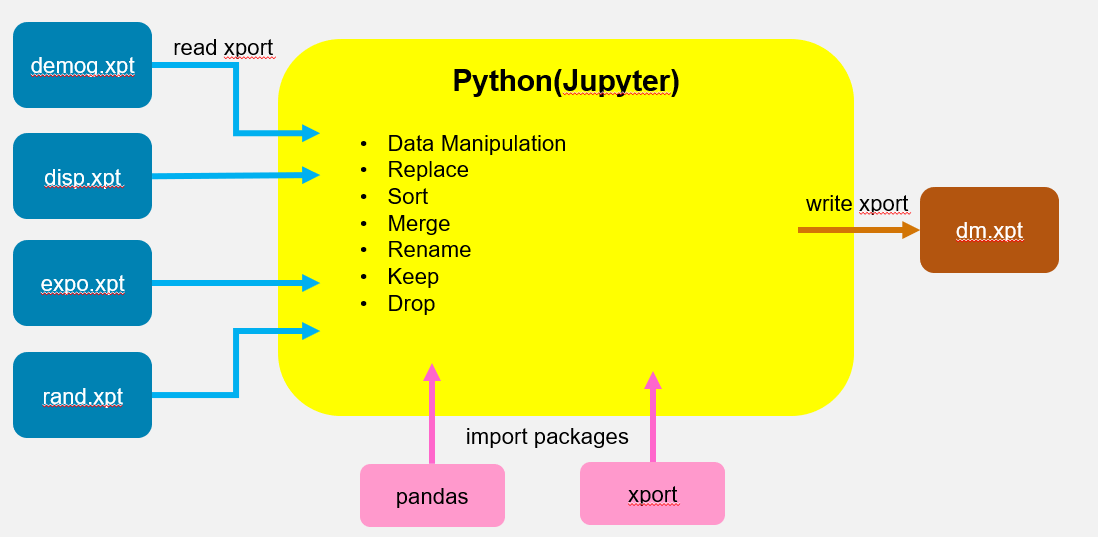

## Prepare demog datasets

In [2]:
### Read Raw demog SAS datasets
with open('./data/raw/demog.xpt', 'rb') as f: 
    df_dm = xport.to_columns(f)
    df_dm2 = pd.DataFrame(df_dm) 

In [3]:
df_dm2.head()

,AGE,AGEU,RACEC,SITEID,STUDYID,SUBJID,SEXC
0,63.0,YEARS,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",701,CDISCPILOT01,1015,Female
1,64.0,YEARS,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",701,CDISCPILOT01,1023,Male
2,71.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1028,Male
3,74.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1033,Male
4,77.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1034,Female


In [4]:
### Prepare variables 
df_dm2['SEX'] = df_dm2.SEXC.replace(['Male','Female'], ['M','F']) # Create SEX variable
df_dm2['DOMAIN'], df_dm2['COUNTRY'] = 'DM', 'USA' # Create varialbes DOMAIN & COUNTRY
df_dm2['USUBJID'] = df_dm2.STUDYID + '-' + df_dm2.SITEID + '-' + df_dm2.SUBJID  # create USUBJID
df_dm2.head()

,AGE,AGEU,RACEC,SITEID,STUDYID,SUBJID,SEXC,SEX,DOMAIN,COUNTRY,USUBJID
0,63.0,YEARS,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",701,CDISCPILOT01,1015,Female,F,DM,USA,CDISCPILOT01-701-1015
1,64.0,YEARS,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",701,CDISCPILOT01,1023,Male,M,DM,USA,CDISCPILOT01-701-1023
2,71.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1028,Male,M,DM,USA,CDISCPILOT01-701-1028
3,74.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1033,Male,M,DM,USA,CDISCPILOT01-701-1033
4,77.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1034,Female,F,DM,USA,CDISCPILOT01-701-1034


In [5]:
for index, _df1 in df_dm2.iterrows():
    ## Create Ethnic
    if _df1['RACEC'].__contains__('HISPANIC'):
        df_dm2.loc[index, 'ETHNIC'] = 'HISPANIC OR LATINO'
    else:
        df_dm2.loc[index, 'ETHNIC'] = 'NOT HISPANIC OR LATINO'
        
    ## Create Race    
    if _df1['RACEC'].__contains__('HISPANIC'):
        df_dm2.loc[index, 'RACE'] = 'WHITE'
    elif _df1['RACEC'].__contains__('CAUCASIAN'):
        df_dm2.loc[index, 'RACE'] = 'WHITE'
    elif _df1['RACEC'].__contains__('AFRICAN'):
        df_dm2.loc[index, 'RACE'] = 'BLACK'
    elif _df1['RACEC'].__contains__('OTHER'):
        df_dm2.loc[index, 'RACE'] = 'OTHER'
        
df_dm2.head()

,AGE,AGEU,RACEC,SITEID,STUDYID,SUBJID,SEXC,SEX,DOMAIN,COUNTRY,USUBJID,ETHNIC,RACE
0,63.0,YEARS,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",701,CDISCPILOT01,1015,Female,F,DM,USA,CDISCPILOT01-701-1015,HISPANIC OR LATINO,WHITE
1,64.0,YEARS,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",701,CDISCPILOT01,1023,Male,M,DM,USA,CDISCPILOT01-701-1023,HISPANIC OR LATINO,WHITE
2,71.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1028,Male,M,DM,USA,CDISCPILOT01-701-1028,NOT HISPANIC OR LATINO,WHITE
3,74.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1033,Male,M,DM,USA,CDISCPILOT01-701-1033,NOT HISPANIC OR LATINO,WHITE
4,77.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1034,Female,F,DM,USA,CDISCPILOT01-701-1034,NOT HISPANIC OR LATINO,WHITE


## Prepare Exposure dataset

In [6]:
### Read exposure datasets
with open('./data/raw/expo.xpt', 'rb') as f: 
    df_ex = xport.to_columns(f)
    df_ex2 = pd.DataFrame(df_ex) 
df_ex2

,SUBJID,EXDOSE,EXDOSU,EXSTDD,EXSTMM,EXSTYY,EXENDD,EXENMM,EXENYY,VISIT,VISITN
0,1015,0.0,mg,2014,01,02,2014,01,16,BASELINE,3.0
1,1015,0.0,mg,2014,01,17,2014,06,18,WEEK 2,4.0
2,1015,0.0,mg,2014,06,19,2014,07,02,WEEK 24,12.0
3,1023,0.0,mg,2012,08,05,2012,08,27,BASELINE,3.0
4,1023,0.0,mg,2012,08,28,2012,09,01,WEEK 2,4.0
...,...,...,...,...,...,...,...,...,...,...,...
586,1355,0.0,mg,2013,08,16,2013,08,29,WEEK 24,12.0
587,1371,54.0,mg,2013,04,26,2013,05,08,BASELINE,3.0
588,1371,81.0,mg,2013,05,09,2013,08,01,WEEK 2,4.0
589,1427,54.0,mg,2012,12,17,2012,12,31,BASELINE,3.0


In [7]:
### Prepare exposure variables
df_ex2['EXSTDTC'] = df_ex2['EXSTDD'] + '-' + df_ex2['EXSTMM'] + '-' + df_ex2['EXSTYY']  # exposure start date
df_ex2['EXENDTC'] = df_ex2['EXENDD'] + '-' + df_ex2['EXENMM'] + '-' + df_ex2['EXENYY']  # exposure end date

### Find the first and last exposure date
df_ex4 = df_ex2.sort_values(by =['SUBJID','EXSTDTC'], ascending=[True, True] )  # sort by subjid and expo date
df_ex4_f = df_ex4.groupby('SUBJID').first()  # pick the first exposure date of the subject
df_ex4_f2 = df_ex4_f.reset_index()  # reset index so that SUBJID is column
df_ex4_f3 = df_ex4_f2[['SUBJID','EXSTDTC']].rename(columns={'EXSTDTC':'RFSTDTC'})  # select variables

df_ex4_l = df_ex4.groupby('SUBJID').last()  # pick the last exposure date of the subject
df_ex4_l2 = df_ex4_l.reset_index()  # reset index so that SUBJID is column
df_ex4_l3 = df_ex4_l2[['SUBJID','EXENDTC']].rename(columns={'EXENDTC':'RFENDTC'})  # select variables

In [8]:
df_ex4_f3.head()

,SUBJID,RFSTDTC
0,1001,2013-10-08
1,1002,2014-01-14
2,1004,2014-01-14
3,1006,2013-02-10
4,1007,2012-07-31


In [9]:
df_ex4_l3.head()

,SUBJID,RFENDTC
0,1001,2014-04-08
1,1002,2014-01-18
2,1004,2014-07-16
3,1006,2013-08-09
4,1007,2012-08-28


### merge exposure data to demog data

In [10]:
### merge first and last exposure date
df_ex5 = pd.merge(df_ex4_f3, df_ex4_l3, on='SUBJID')

### merge exposure data to demog data
df_dm3 = pd.merge(df_dm2, df_ex5, on='SUBJID', how='left')  # merge exposure information to dm

In [11]:
df_dm3.head()

,AGE,AGEU,RACEC,SITEID,STUDYID,SUBJID,SEXC,SEX,DOMAIN,COUNTRY,USUBJID,ETHNIC,RACE,RFSTDTC,RFENDTC
0,63.0,YEARS,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",701,CDISCPILOT01,1015,Female,F,DM,USA,CDISCPILOT01-701-1015,HISPANIC OR LATINO,WHITE,2014-01-02,2014-07-02
1,64.0,YEARS,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",701,CDISCPILOT01,1023,Male,M,DM,USA,CDISCPILOT01-701-1023,HISPANIC OR LATINO,WHITE,2012-08-05,2012-09-01
2,71.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1028,Male,M,DM,USA,CDISCPILOT01-701-1028,NOT HISPANIC OR LATINO,WHITE,2013-07-19,2014-01-14
3,74.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1033,Male,M,DM,USA,CDISCPILOT01-701-1033,NOT HISPANIC OR LATINO,WHITE,2014-03-18,2014-03-31
4,77.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1034,Female,F,DM,USA,CDISCPILOT01-701-1034,NOT HISPANIC OR LATINO,WHITE,2014-07-01,2014-12-30


## Prepare Randomization data

In [12]:
### Read SAS datasets from the local drive
with open('./data/raw/rand.xpt', 'rb') as f: 
    df_rm = xport.to_columns(f)
    df_rm2 = pd.DataFrame(df_rm) 


### merge randomization data to demog data

In [13]:
### Merge(inner join) randomization with demo by SUBJID. 
df_dm4 = pd.merge(df_dm3, df_rm2, on='SUBJID', how='left')
df_dm4['ARM'] = df_dm4.DRUG
df_dm4['ARMCD'] = df_dm4.ARM.replace(['Control','Study Drug'], ['C','SD'])
df_dm4['ACTARMCD'] = df_dm4.ARMCD
df_dm4['ACTARM'] = df_dm4.ARM

In [14]:
df_dm4.head()

,AGE,AGEU,RACEC,SITEID,STUDYID,SUBJID,SEXC,SEX,DOMAIN,COUNTRY,USUBJID,ETHNIC,RACE,RFSTDTC,RFENDTC,DRUG,ARM,ARMCD,ACTARMCD,ACTARM
0,63.0,YEARS,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",701,CDISCPILOT01,1015,Female,F,DM,USA,CDISCPILOT01-701-1015,HISPANIC OR LATINO,WHITE,2014-01-02,2014-07-02,Study Drug,Study Drug,SD,SD,Study Drug
1,64.0,YEARS,"HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...",701,CDISCPILOT01,1023,Male,M,DM,USA,CDISCPILOT01-701-1023,HISPANIC OR LATINO,WHITE,2012-08-05,2012-09-01,Control,Control,C,C,Control
2,71.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1028,Male,M,DM,USA,CDISCPILOT01-701-1028,NOT HISPANIC OR LATINO,WHITE,2013-07-19,2014-01-14,Control,Control,C,C,Control
3,74.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1033,Male,M,DM,USA,CDISCPILOT01-701-1033,NOT HISPANIC OR LATINO,WHITE,2014-03-18,2014-03-31,Study Drug,Study Drug,SD,SD,Study Drug
4,77.0,YEARS,CAUCASIAN,701,CDISCPILOT01,1034,Female,F,DM,USA,CDISCPILOT01-701-1034,NOT HISPANIC OR LATINO,WHITE,2014-07-01,2014-12-30,Study Drug,Study Drug,SD,SD,Study Drug


## Prepare Dispostion data

In [15]:
### Read disposition datasets from the local drive
with open('./data/raw/disp.xpt', 'rb') as f: 
    df_ds = xport.to_columns(f)
    df_ds2 = pd.DataFrame(df_ds) 


In [16]:
### Prepare dispostion data
df_ds2['DSSTDTC'] =   df_ds2['DSSTDD'] + '-' + df_ds2['DSSTMM'] + '-' + df_ds2['DSSTYY']  # dispostion date

### prepare death data
for index3, _df3 in df_ds2.iterrows(): 
    if _df3.DISP == 'DEATH':
        df_ds2.loc[index3, 'DTHDTC'] = _df3.DSSTDTC
        df_ds2.loc[index3, 'DTHFL'] = 'Y'
        
df_ds2['RFPENDTC'] = df_ds2.DSSTDTC
df_ds4 = df_ds2[['SUBJID', 'RFPENDTC', 'DTHFL', 'DTHDTC']]


### Merge dispostion data to demog data

In [17]:
df_dm5 = pd.merge(df_dm4, df_ds4, on='SUBJID', how='left')
print(df_dm5.head())

    AGE   AGEU                                              RACEC SITEID  \
0  63.0  YEARS  HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...    701   
1  64.0  YEARS  HISPANIC (MEXICAN - AMERICAN, MEXICO, CENTRAL ...    701   
2  71.0  YEARS                                          CAUCASIAN    701   
3  74.0  YEARS                                          CAUCASIAN    701   
4  77.0  YEARS                                          CAUCASIAN    701   

        STUDYID SUBJID    SEXC SEX DOMAIN COUNTRY  ...     RFSTDTC  \
0  CDISCPILOT01   1015  Female   F     DM     USA  ...  2014-01-02   
1  CDISCPILOT01   1023    Male   M     DM     USA  ...  2012-08-05   
2  CDISCPILOT01   1028    Male   M     DM     USA  ...  2013-07-19   
3  CDISCPILOT01   1033    Male   M     DM     USA  ...  2014-03-18   
4  CDISCPILOT01   1034  Female   F     DM     USA  ...  2014-07-01   

      RFENDTC        DRUG         ARM ARMCD ACTARMCD      ACTARM    RFPENDTC  \
0  2014-07-02  Study Drug  Study Drug    S

In [18]:
### Prepare demographic data
df_dm6 = df_dm5.drop(columns=['SEXC','RACEC','DRUG'])  # drop sex variable
#df_dm6 = df_dm5.drop(['SEXC','RACEC','DRUG'],1)  # drop sex variable
df_dm6['RFXSTTDTC'], df_dm6['RFSENDTC'], df_dm6['RFICDTC'] = df_dm6.RFSTDTC, df_dm6.RFENDTC, ''  

In [19]:
df_dm6.head()

,AGE,AGEU,SITEID,STUDYID,SUBJID,SEX,DOMAIN,COUNTRY,USUBJID,ETHNIC,...,ARM,ARMCD,ACTARMCD,ACTARM,RFPENDTC,DTHFL,DTHDTC,RFXSTTDTC,RFSENDTC,RFICDTC
0,63.0,YEARS,701,CDISCPILOT01,1015,F,DM,USA,CDISCPILOT01-701-1015,HISPANIC OR LATINO,...,Study Drug,SD,SD,Study Drug,2014-07-02,NaN,NaN,2014-01-02,2014-07-02,
1,64.0,YEARS,701,CDISCPILOT01,1023,M,DM,USA,CDISCPILOT01-701-1023,HISPANIC OR LATINO,...,Control,C,C,Control,2012-09-02,NaN,NaN,2012-08-05,2012-09-01,
2,71.0,YEARS,701,CDISCPILOT01,1028,M,DM,USA,CDISCPILOT01-701-1028,NOT HISPANIC OR LATINO,...,Control,C,C,Control,2014-01-14,NaN,NaN,2013-07-19,2014-01-14,
3,74.0,YEARS,701,CDISCPILOT01,1033,M,DM,USA,CDISCPILOT01-701-1033,NOT HISPANIC OR LATINO,...,Study Drug,SD,SD,Study Drug,2014-04-14,NaN,NaN,2014-03-18,2014-03-31,
4,77.0,YEARS,701,CDISCPILOT01,1034,F,DM,USA,CDISCPILOT01-701-1034,NOT HISPANIC OR LATINO,...,Study Drug,SD,SD,Study Drug,2014-12-30,NaN,NaN,2014-07-01,2014-12-30,


## Write CDISC DM dataset

In [20]:
with open('./data/cdisc/dm.xpt', 'wb') as f:
    xport.from_dataframe(df_dm6, f)## write DM 